In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Cargar el dataset
from sklearn import datasets


In [4]:
iris_dt = datasets.load_iris()
#iris_dt
iris = pd.DataFrame(data = np.c_[iris_dt['data'],iris_dt['target']], columns = iris_dt['feature_names'] + ['target'])

In [6]:
iris.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [7]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
iris.groupby('target').size()

target
0.0    50
1.0    50
2.0    50
dtype: int64

In [9]:
#Separación de conjuntos de entrenamiento y testeo
from sklearn.model_selection import train_test_split

iris_train, iris_test = train_test_split(iris, test_size = 0.4, stratify = iris['target'], random_state = 42)

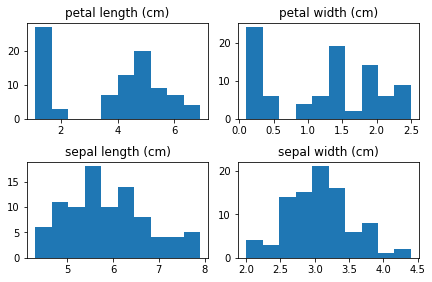

In [12]:
fig, axs = plt.subplots(2,2)
b = 10

axs[0,0].hist(iris_train['petal length (cm)'], bins = b);
axs[0,0].set_title('petal length (cm)');

axs[0,1].hist(iris_train['petal width (cm)'], bins = b);
axs[0,1].set_title('petal width (cm)');

axs[1,0].hist(iris_train['sepal length (cm)'], bins = b);
axs[1,0].set_title('sepal length (cm)');

axs[1,1].hist(iris_train['sepal width (cm)'], bins = b);
axs[1,1].set_title('sepal width (cm)');

fig.tight_layout(pad = 1.0)

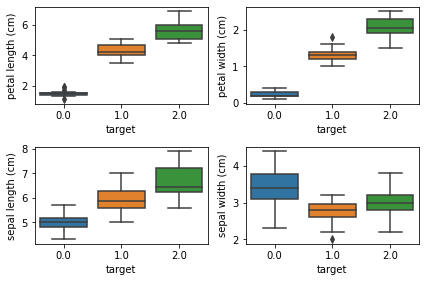

In [13]:
fig, axs = plt.subplots(2,2)
at = ['petal length (cm)', 'petal width (cm)','sepal length (cm)','sepal width (cm)']
sp = [0.0, 1.0, 2.0]
sns.boxplot(x = 'target', y = at[0], data = iris_train, order = sp, ax = axs[0,0]);
sns.boxplot(x = 'target', y = at[1], data = iris_train, order = sp, ax = axs[0,1]);
sns.boxplot(x = 'target', y = at[2], data = iris_train, order = sp, ax = axs[1,0]);
sns.boxplot(x = 'target', y = at[3], data = iris_train, order = sp, ax = axs[1,1]);

fig.tight_layout(pad = 1.0);

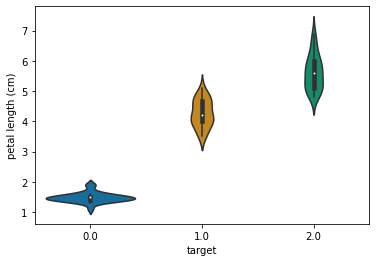

In [14]:
#grafica de violin
sns.violinplot(x = 'target', y = at[0], data = iris_train, size = 5, orden = sp, palette = 'colorblind');

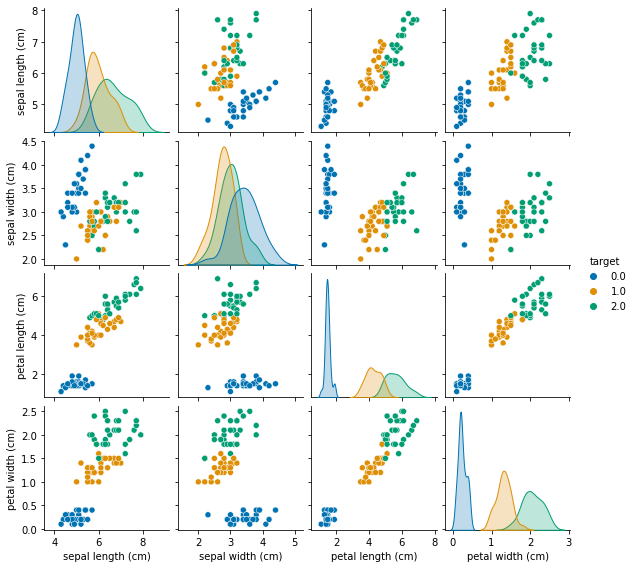

In [15]:
#grafico de pares
sns.pairplot(iris_train, hue = 'target', height = 2, palette = 'colorblind');

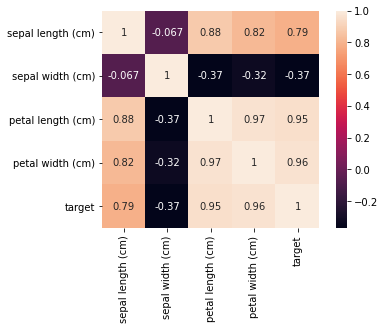

In [16]:
matriz_correlacion = iris_train.corr()
sns.heatmap(matriz_correlacion, annot = True, square = True);

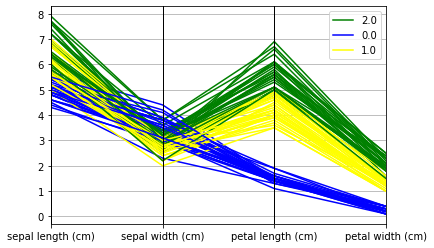

In [18]:
#Grafica de lineas de discriminacion
from pandas.plotting import parallel_coordinates
parallel_coordinates(iris_train, 'target', color = ['green', 'blue', 'yellow']);

###CREAR MODELO

In [29]:
# Separar conjuntos
X = np.c_[iris_train['petal length (cm)'], iris_train['petal width (cm)']]
y = iris_train['target']

In [20]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(C = 100000)
modelo

LogisticRegression(C=100000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
modelo.fit(X,y)

LogisticRegression(C=100000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

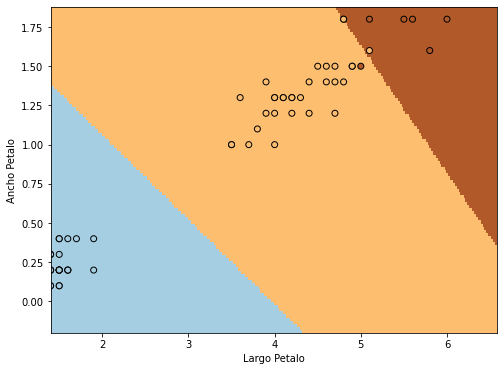

In [25]:
#Visualizacion del modelo de clasificacion
x_min, x_max = X[0].min() - .5, X[0].max() + .5
y_min, y_max = X[1].min() - .5, X[1].max() + .5
h = .02

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])

#añadiendo color a la grafica
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8,6))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

#añade los puntos de cada conjunto
plt.scatter(iris_train['petal length (cm)'], iris_train['petal width (cm)'], c = iris_train['target'], edgecolors = 'k', cmap = plt.cm.Paired)
plt.xlabel('Largo Petalo')
plt.ylabel('Ancho Petalo')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

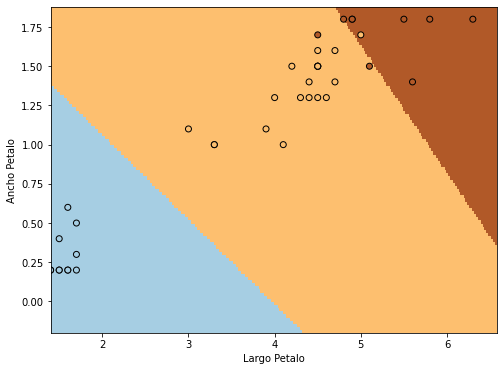

In [28]:
#Visualizacion del modelo de clasificacion
x_min, x_max = X[0].min() - .5, X[0].max() + .5
y_min, y_max = X[1].min() - .5, X[1].max() + .5
h = .02

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])

#añadiendo color a la grafica
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8,6))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

#añade los puntos de cada conjunto
plt.scatter(iris_test['petal length (cm)'], iris_test['petal width (cm)'], c = iris_test['target'], edgecolors = 'k', cmap = plt.cm.Paired)
plt.xlabel('Largo Petalo')
plt.ylabel('Ancho Petalo')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

###Comparar con otros modelos

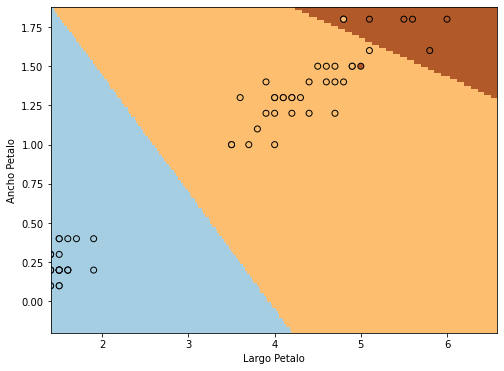

In [35]:
#Crear Modelo
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

modelo = LinearDiscriminantAnalysis()
modelo.fit(X,y)

#Visualizacion del modelo de clasificacion
x_min, x_max = X[0].min() - .5, X[0].max() + .5
y_min, y_max = X[1].min() - .5, X[1].max() + .5
h = .02

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])

#añadiendo color a la grafica
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8,6))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

#añade los puntos de cada conjunto
plt.scatter(iris_train['petal length (cm)'], iris_train['petal width (cm)'], c = iris_train['target'], edgecolors = 'k', cmap = plt.cm.Paired)
plt.xlabel('Largo Petalo')
plt.ylabel('Ancho Petalo')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

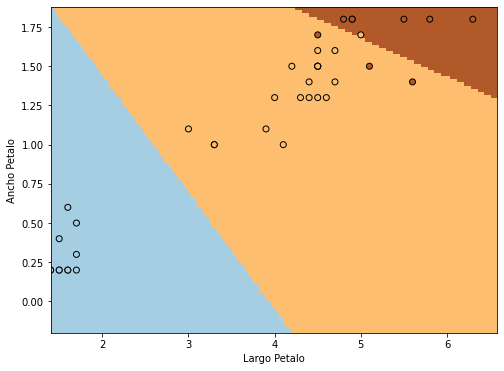

In [36]:
#Visualizacion del modelo de clasificacion
x_min, x_max = X[0].min() - .5, X[0].max() + .5
y_min, y_max = X[1].min() - .5, X[1].max() + .5
h = .02

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])

#añadiendo color a la grafica
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8,6))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

#añade los puntos de cada conjunto
plt.scatter(iris_test['petal length (cm)'], iris_test['petal width (cm)'], c = iris_test['target'], edgecolors = 'k', cmap = plt.cm.Paired)
plt.xlabel('Largo Petalo')
plt.ylabel('Ancho Petalo')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

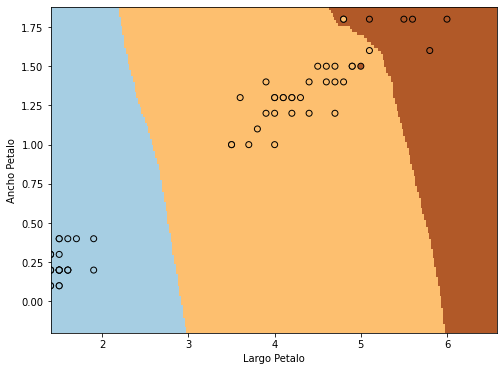

In [37]:
#Crear Modelo
from sklearn.neighbors import KNeighborsClassifier

modelo = KNeighborsClassifier()
modelo.fit(X,y)

#Visualizacion del modelo de clasificacion
x_min, x_max = X[0].min() - .5, X[0].max() + .5
y_min, y_max = X[1].min() - .5, X[1].max() + .5
h = .02

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])

#añadiendo color a la grafica
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8,6))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

#añade los puntos de cada conjunto
plt.scatter(iris_train['petal length (cm)'], iris_train['petal width (cm)'], c = iris_train['target'], edgecolors = 'k', cmap = plt.cm.Paired)
plt.xlabel('Largo Petalo')
plt.ylabel('Ancho Petalo')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

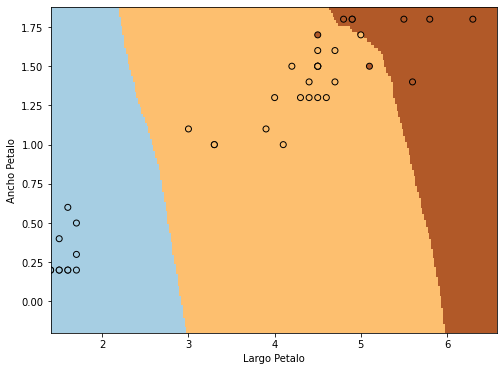

In [38]:
#Visualizacion del modelo de clasificacion
x_min, x_max = X[0].min() - .5, X[0].max() + .5
y_min, y_max = X[1].min() - .5, X[1].max() + .5
h = .02

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])

#añadiendo color a la grafica
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8,6))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

#añade los puntos de cada conjunto
plt.scatter(iris_test['petal length (cm)'], iris_test['petal width (cm)'], c = iris_test['target'], edgecolors = 'k', cmap = plt.cm.Paired)
plt.xlabel('Largo Petalo')
plt.ylabel('Ancho Petalo')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

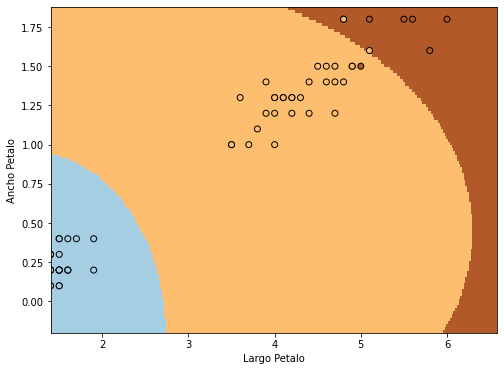

In [39]:
#Crear Modelo
from sklearn.naive_bayes import GaussianNB

modelo = GaussianNB()
modelo.fit(X,y)

#Visualizacion del modelo de clasificacion
x_min, x_max = X[0].min() - .5, X[0].max() + .5
y_min, y_max = X[1].min() - .5, X[1].max() + .5
h = .02

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])

#añadiendo color a la grafica
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8,6))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

#añade los puntos de cada conjunto
plt.scatter(iris_train['petal length (cm)'], iris_train['petal width (cm)'], c = iris_train['target'], edgecolors = 'k', cmap = plt.cm.Paired)
plt.xlabel('Largo Petalo')
plt.ylabel('Ancho Petalo')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

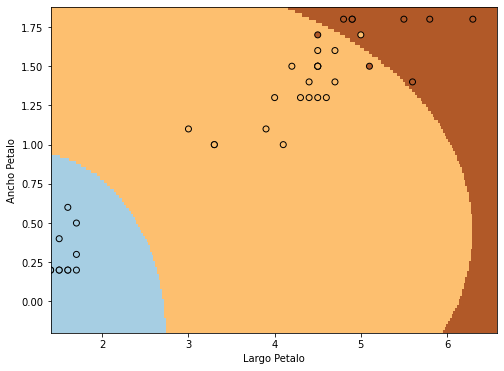

In [40]:
#Visualizacion del modelo de clasificacion
x_min, x_max = X[0].min() - .5, X[0].max() + .5
y_min, y_max = X[1].min() - .5, X[1].max() + .5
h = .02

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])

#añadiendo color a la grafica
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8,6))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

#añade los puntos de cada conjunto
plt.scatter(iris_test['petal length (cm)'], iris_test['petal width (cm)'], c = iris_test['target'], edgecolors = 'k', cmap = plt.cm.Paired)
plt.xlabel('Largo Petalo')
plt.ylabel('Ancho Petalo')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

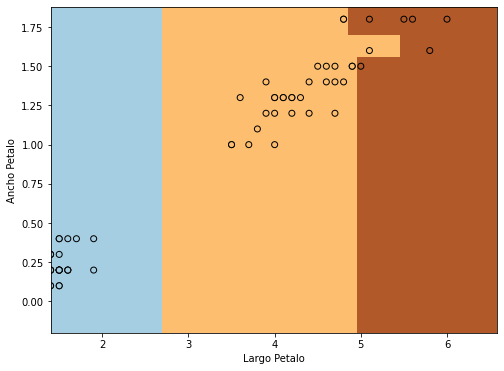

In [43]:
#Crear Modelo
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier()
modelo.fit(X,y)

#Visualizacion del modelo de clasificacion
x_min, x_max = X[0].min() - .5, X[0].max() + .5
y_min, y_max = X[1].min() - .5, X[1].max() + .5
h = .02

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])

#añadiendo color a la grafica
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8,6))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

#añade los puntos de cada conjunto
plt.scatter(iris_train['petal length (cm)'], iris_train['petal width (cm)'], c = iris_train['target'], edgecolors = 'k', cmap = plt.cm.Paired)
plt.xlabel('Largo Petalo')
plt.ylabel('Ancho Petalo')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

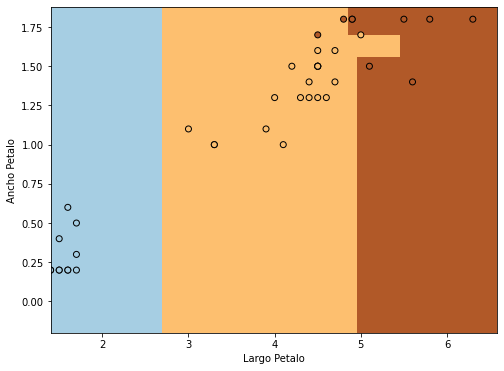

In [44]:
#Visualizacion del modelo de clasificacion
x_min, x_max = X[0].min() - .5, X[0].max() + .5
y_min, y_max = X[1].min() - .5, X[1].max() + .5
h = .02

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])

#añadiendo color a la grafica
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8,6))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

#añade los puntos de cada conjunto
plt.scatter(iris_test['petal length (cm)'], iris_test['petal width (cm)'], c = iris_test['target'], edgecolors = 'k', cmap = plt.cm.Paired)
plt.xlabel('Largo Petalo')
plt.ylabel('Ancho Petalo')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

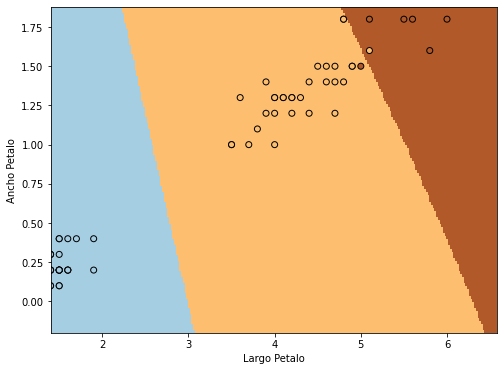

In [45]:
#Crear Modelo
from sklearn.svm import SVC

modelo = SVC()
modelo.fit(X,y)

#Visualizacion del modelo de clasificacion
x_min, x_max = X[0].min() - .5, X[0].max() + .5
y_min, y_max = X[1].min() - .5, X[1].max() + .5
h = .02

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])

#añadiendo color a la grafica
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8,6))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

#añade los puntos de cada conjunto
plt.scatter(iris_train['petal length (cm)'], iris_train['petal width (cm)'], c = iris_train['target'], edgecolors = 'k', cmap = plt.cm.Paired)
plt.xlabel('Largo Petalo')
plt.ylabel('Ancho Petalo')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

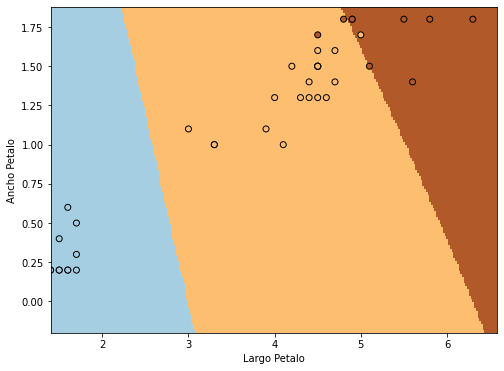

In [46]:
#Visualizacion del modelo de clasificacion
x_min, x_max = X[0].min() - .5, X[0].max() + .5
y_min, y_max = X[1].min() - .5, X[1].max() + .5
h = .02

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])

#añadiendo color a la grafica
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8,6))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

#añade los puntos de cada conjunto
plt.scatter(iris_test['petal length (cm)'], iris_test['petal width (cm)'], c = iris_test['target'], edgecolors = 'k', cmap = plt.cm.Paired)
plt.xlabel('Largo Petalo')
plt.ylabel('Ancho Petalo')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

Modelo:  LRC  Promedio:  0.9666666666666666  std:  0.04444444444444447
Modelo:  LDA  Promedio:  0.9777777777777779  std:  0.027216552697590882
Modelo:  kNN  Promedio:  0.9666666666666666  std:  0.04444444444444447
Modelo:  DTC  Promedio:  0.9  std:  0.07370277311900887
Modelo:  GNB  Promedio:  0.9666666666666666  std:  0.04444444444444447
Modelo:  SVM  Promedio:  0.9666666666666666  std:  0.04444444444444447


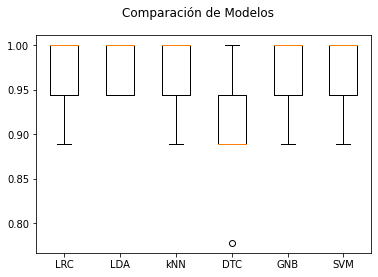

In [47]:
#Evaluacion entre modelos
from sklearn.model_selection import cross_val_score

modelos = []
modelos.append(('LRC', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('kNN', KNeighborsClassifier()))
modelos.append(('DTC', DecisionTreeClassifier()))
modelos.append(('GNB', GaussianNB()))
modelos.append(('SVM', SVC()))

resultados = []
nombres = []
for nombre, model in modelos:
  resultado_parcial = cross_val_score(model, X, y, scoring = 'accuracy')
  resultados.append(resultado_parcial)
  nombres.append(nombre)

  print('Modelo: ', nombre, ' Promedio: ', resultado_parcial.mean(), ' std: ', resultado_parcial.std())

#visualizar los resultados
fig = plt.figure()
fig.suptitle('Comparación de Modelos')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nombres)
plt.show()